<a href="https://colab.research.google.com/github/ShreyasKadiri/Natural-Language-Processing/blob/main/EDA_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#Exploratory Data Analysis and Visualization

In [38]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
from google.colab import files

In [13]:
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


In [14]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [15]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Processing /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303/kaggle-1.5.12-cp37-none-any.whl
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [16]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        166           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        300           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        899           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       5561           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      44591            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge      11586            True  
connectx

In [17]:
#Ref: https://www.kaggle.com/snap/amazon-fine-food-reviews    to download the dataset

In [39]:
df = pd.read_csv("/content/Reviews.csv")

In [40]:
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0.0,0.0,4.0,1.342051e+09,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0.0,0.0,5.0,1.340150e+09,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0.0,0.0,5.0,1.336003e+09,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1.0,1.0,5.0,1.322006e+09,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0.0,0.0,5.0,1.351210e+09,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [41]:
print(df.shape)
print(df.isnull().values.any())
df.dropna(axis = 0 , inplace = True)
print(df.shape)

(305311, 10)
True
(305288, 10)


In [42]:
df.drop_duplicates(subset=['Score','Text'],keep='first',inplace=True)
print(df.shape)
df.head(10)

(235291, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0.0,0.0,4.0,1.342051e+09,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0.0,0.0,5.0,1.340150e+09,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0.0,0.0,5.0,1.336003e+09,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1.0,1.0,5.0,1.322006e+09,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0.0,0.0,5.0,1.351210e+09,Healthy Dog Food,This is a very healthy dog food. Good for thei...


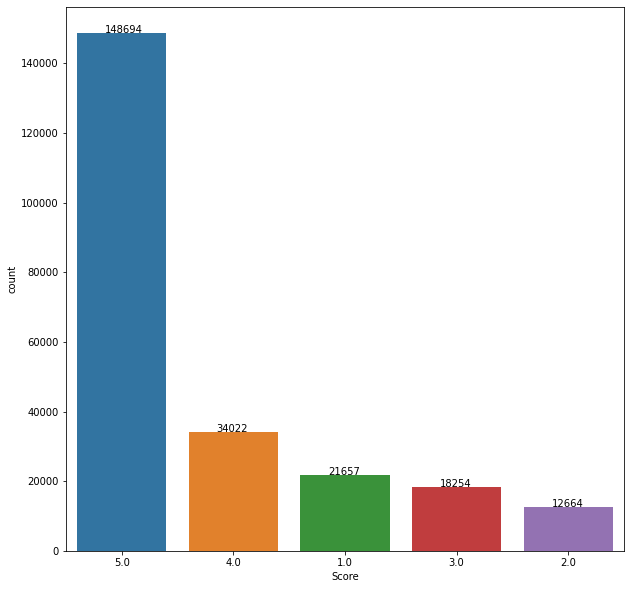

In [43]:
plt.figure(figsize=(10,10))

ax = sns.countplot(x=df["Score"],  data=df, order = df["Score"].value_counts().index )
for p, label in zip(ax.patches, df["Score"].value_counts()):
    #print(p)
    #print(label)
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

In [44]:
df.groupby('ProductId').count()

,Id,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
ProductId,,,,,,,,,
0006641040,37,37,37,37,37,37,37,37,37
2734888454,2,2,2,2,2,2,2,2,2
9376674501,1,1,1,1,1,1,1,1,1
B00002N8SM,38,38,38,38,38,38,38,38,38
B00002NCJC,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...
B009RSR8HO,14,14,14,14,14,14,14,14,14
B009SF0TN6,1,1,1,1,1,1,1,1,1
B009SR4OQ2,1,1,1,1,1,1,1,1,1


In [45]:
df_products = df.groupby('ProductId').filter(lambda x: len(x) >= 400)
df_product_groups = df_products.groupby('ProductId')

In [46]:
print(len(df_products))
print(len(df_product_groups))

8986
18


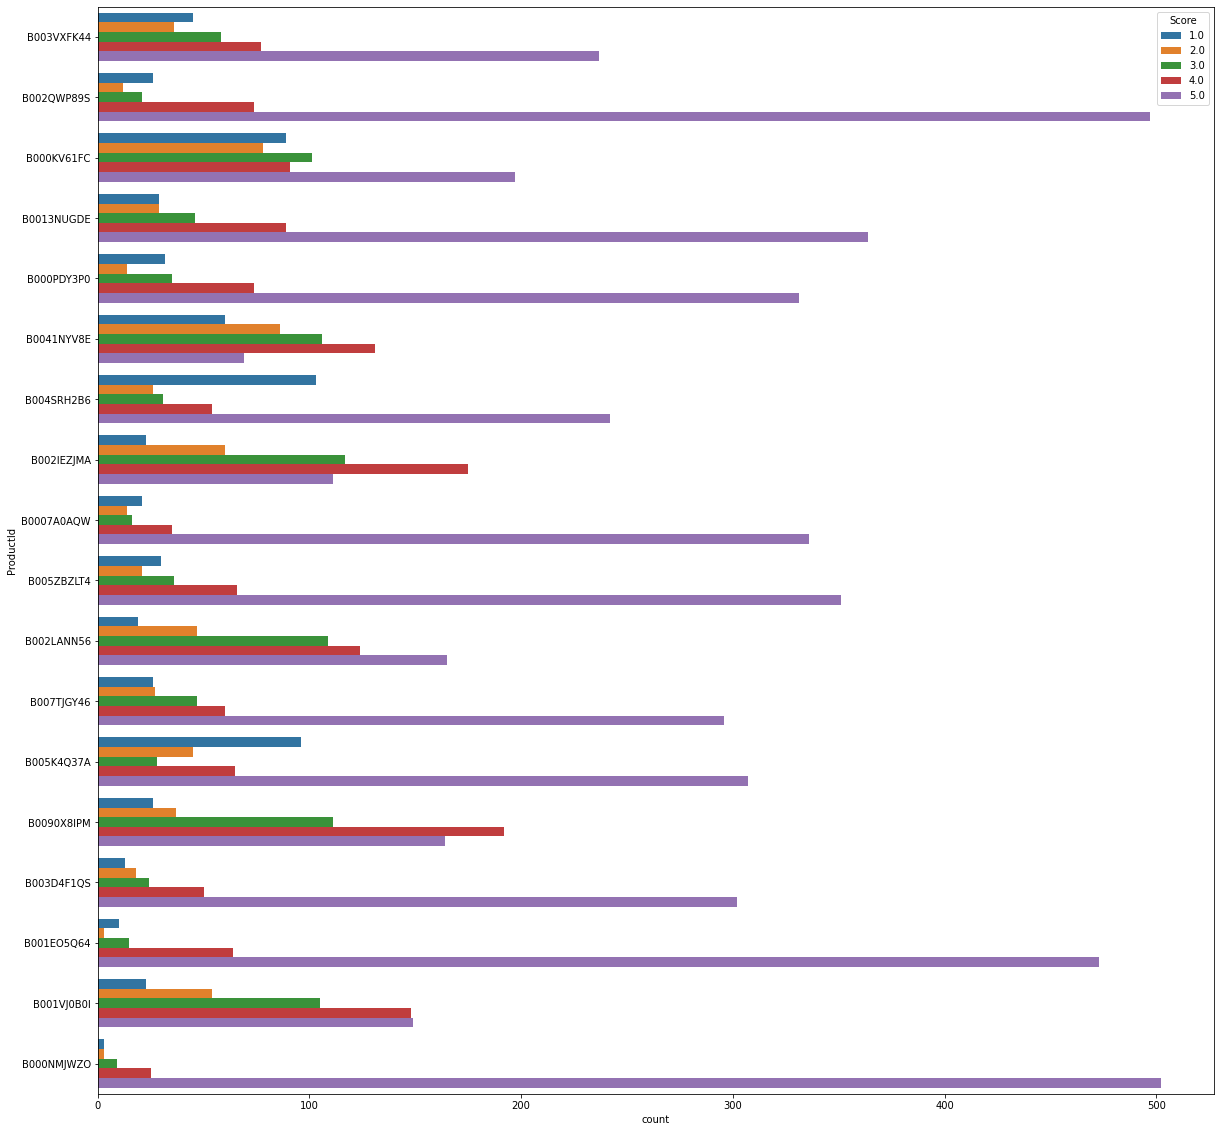

In [47]:
plt.figure(figsize=(20,20))
sns.countplot(y="ProductId",  hue="Score", data=df_products);

In [48]:
df.groupby('UserId').count()

,Id,ProductId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
UserId,,,,,,,,,
#oc-R103C0QSV1DF5E,1,1,1,1,1,1,1,1,1
#oc-R10UA029WVWIUI,1,1,1,1,1,1,1,1,1
#oc-R115TNMSPFT9I7,1,1,1,1,1,1,1,1,1
#oc-R119LM8D59ZW8Y,1,1,1,1,1,1,1,1,1
#oc-R11D9D7SHXIJB9,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
AZZV61COVM8CA,1,1,1,1,1,1,1,1,1
AZZVNIMTTMJH6,1,1,1,1,1,1,1,1,1
AZZY649VYAHQS,1,1,1,1,1,1,1,1,1


In [49]:
df_users = df.groupby('UserId').filter(lambda x: len(x) >= 10)
df_userGroup = df_users.groupby('UserId')
print(len(df_userGroup))

1174


In [50]:
df_users = df.groupby('UserId').filter(lambda x: len(x) >= 5)
df_userGroup = df_users.groupby('UserId')
print(len(df_userGroup))

4229


In [33]:
df_users = df.groupby('UserId').filter(lambda x: len(x) >= 2)
df_userGroup = df_users.groupby('UserId')
print(len(df_userGroup))

7831


In [51]:
df_users = df.groupby('UserId').filter(lambda x: len(x) >= 50)
df_userGroup = df_users.groupby('UserId')
print(len(df_userGroup))

35


In [52]:
df_users = df.groupby('UserId').filter(lambda x: len(x) >= 100)
df_userGroup = df_users.groupby('UserId')
print("Number of Users:"+ str(len(df_userGroup)))
df_products = df_users.groupby('ProductId')
print("Number of products:"+ str(len(df_products)))

Number of Users:5
Number of products:665


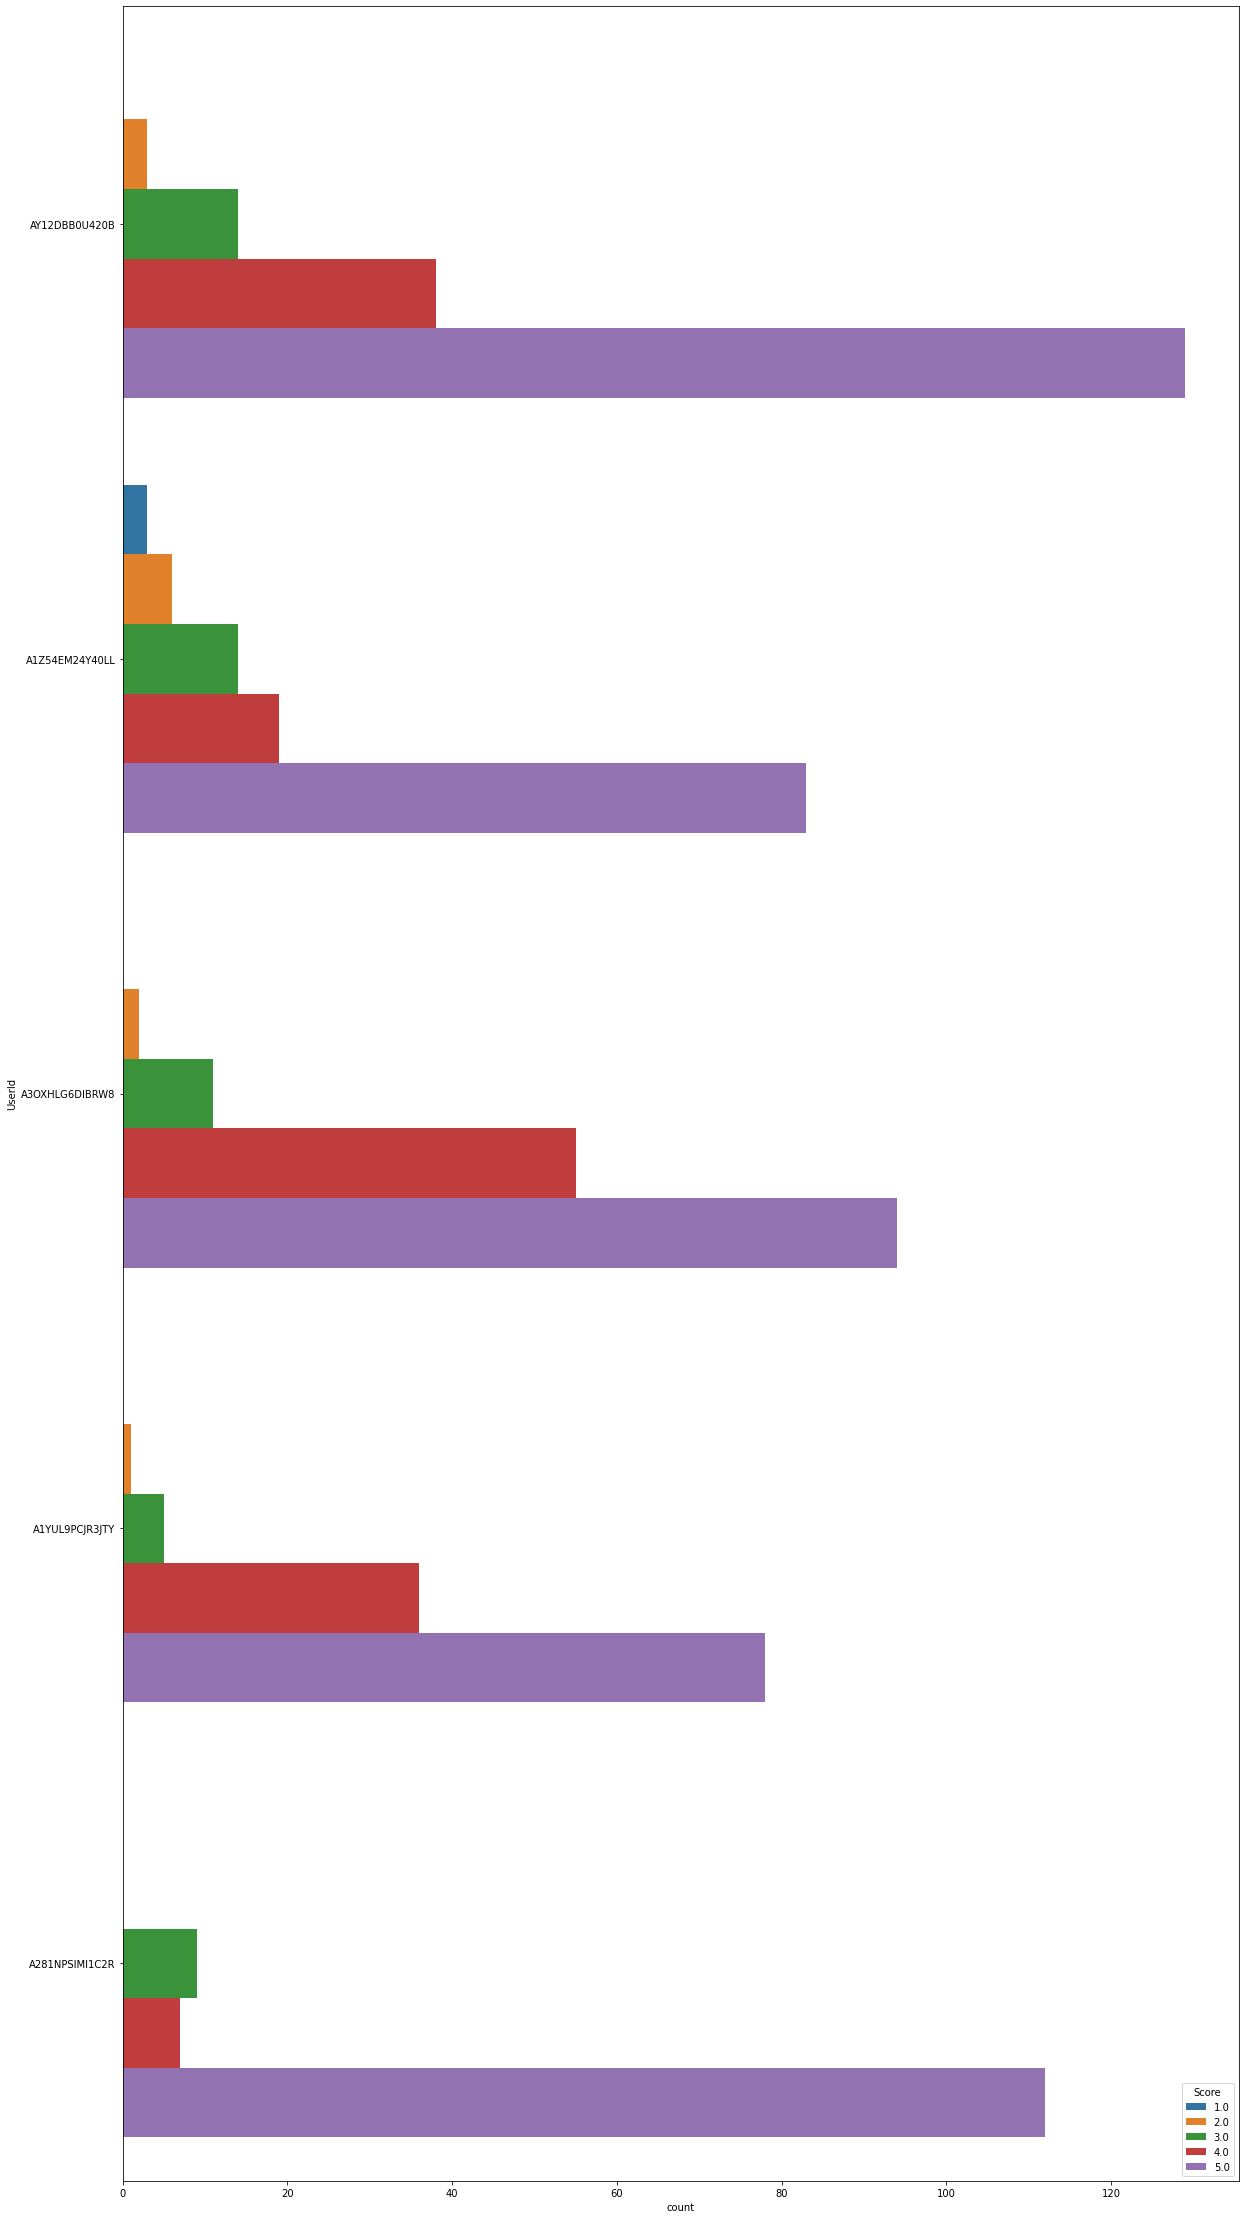

In [53]:
plt.figure(figsize=(20,40))
sns.countplot(y="UserId", hue="Score", data=df_users)

In [66]:
#Performing text analysis 
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
import nltk

In [67]:
def remove_Stopwords(text ):
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize( text.lower() ) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)
    

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    
    return text2.lower()

In [68]:
mask = (df["Score"] == 1) | (df["Score"] == 2)
df_rating12 = df[mask]
mask = (df["Score"]==4) | (df["Score"]==5) | (df["Score"]==3)
df_rating345 = df[mask]

In [69]:
print(len(df_rating12))
print(len(df_rating345))

34321
200970


In [77]:
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
df_rating12['Text'] = df_rating12['Text'].apply(clean_text)
df_rating12['Text'] = df_rating12['Text'].apply(remove_Stopwords)
df_rating12['Text'] = df_rating12['Text'].apply(lemmatize_text)


df_rating345['Text'] = df_rating345['Text'].apply(clean_text)
df_rating345['Text'] = df_rating345['Text'].apply(remove_Stopwords)
df_rating345['Text'] = df_rating345['Text'].apply(lemmatize_text)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [78]:
df_rating12['Num_words_text'] = df_rating12['Text'].apply(lambda x:len(str(x).split())) 
df_rating345['Num_words_text'] = df_rating345['Text'].apply(lambda x:len(str(x).split()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
df_rating12['Num_words_text'].describe()

count    34321.000000
mean        44.476035
std         42.455784
min          3.000000
25%         19.000000
50%         32.000000
75%         54.000000
max        967.000000
Name: Num_words_text, dtype: float64

In [80]:
df_rating345['Num_words_text'].describe()

count    200970.000000
mean         41.258138
std          42.011411
min           1.000000
25%          17.000000
50%          28.000000
75%          50.000000
max        1975.000000
Name: Num_words_text, dtype: float64

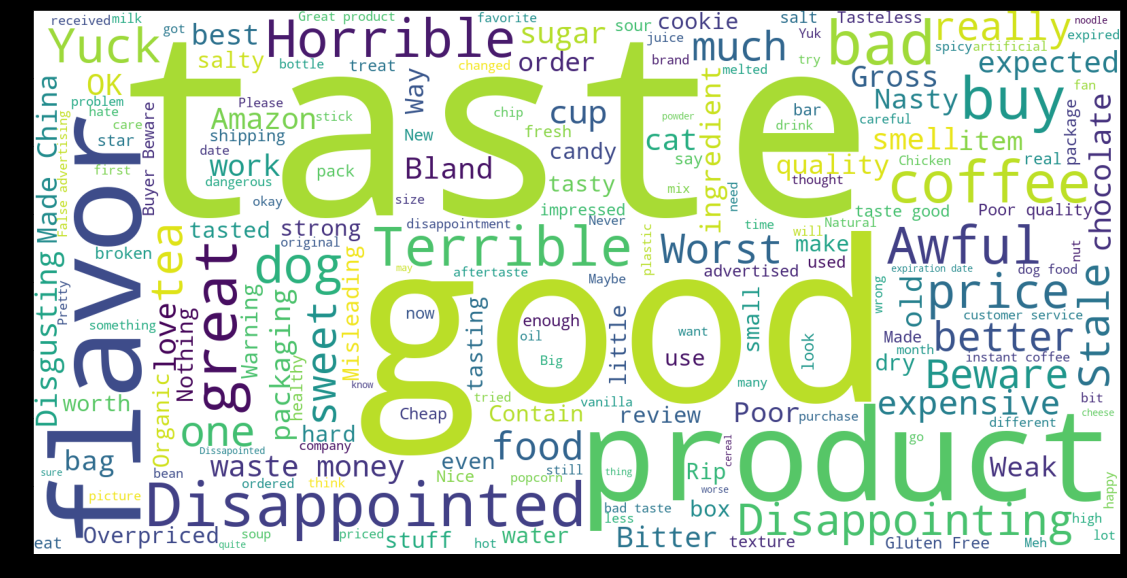

In [81]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_rating12['Summary'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

(-0.5, 1599.5, 799.5, -0.5)

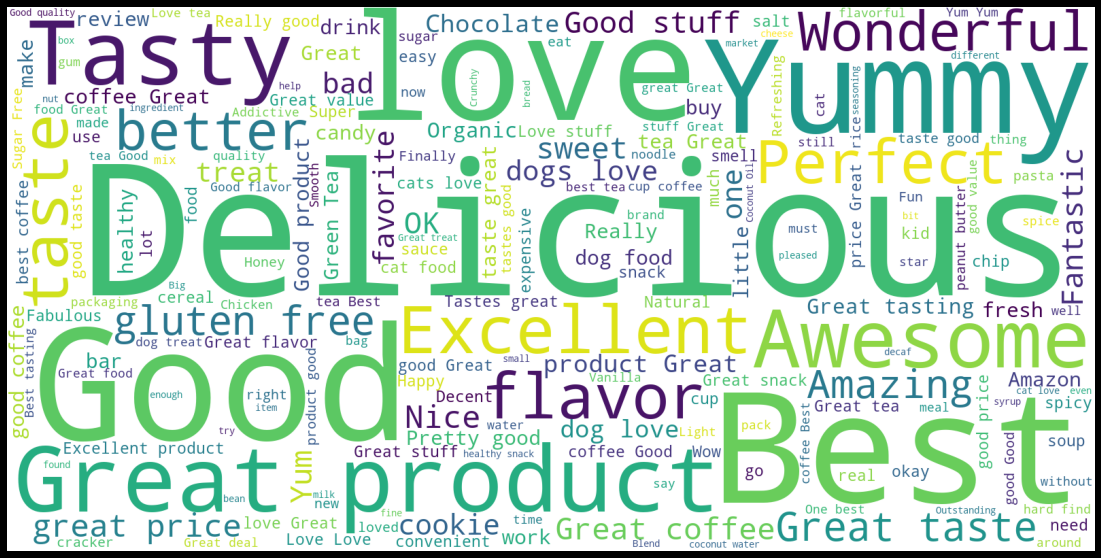

In [82]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_rating345['Summary'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")